# Task overview
In this homework assignment, you will implement a simple Transformer architecture using only basic layers such as nn.Embedding, nn.Linear, ReLU, softmax, and einsum. This will be a decoder-only model (language model), trained on a toy problem. You will analyze the results of the baseline Transformer and results with some minor changes to its components.

# Dataset
The dataset has already been generated for you. It is an artificial and simple dataset that was designed to make training quick and debugging easy. Each example in the dataset consists of a sequence of tokens, with each token represented by a number from 0 to 9. The length of each sequence is 64 tokens. Each and every sequence starts with token 0 (zero).

This is a language modeling task, which means that your model's task is to predict the next token in the sequence. Specifically, for each prefix of the input sequence, your model will generate a prediction for the token that should follow.

The dataset was generated in a particular way, but you don't need to know the details in order to complete the homework assignment. These details are provided in the code that generates the dataset. However, as an overview, we can see some patterns emerging in the following example sequences:

* [0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 7, 8, 6, 7, 8, 6, 9, 4, ...]
  * In this example, 0 seems to always be followed by 1.
* [0, 4, 9, 7, 8, 9, 0, 4, 5, 2, 8, 5, 2, 8, 5, 2, 3, 4, 5, 2, 8, 9, 0, 4, ...]
  * Here, however, 0 is followed by 4.
* [0, 1, 2, 3, 4, 5, 3, 4, 7, 8, 0, 1, 2, 5, 3, 4, 7, 8, 0, 1, 6, 9, 2, 5, ...]
  * In every example we can see that the number N is often followed by N+1.


Each example is constructed with random patterns. In order to accurately predict the next token, your model will need to learn these patterns "on the fly" as it processes each example. This is called "in-context learning," where the model learns how to figure out the pattern instead of learning the pattern during training.

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

[Alternatively, you can also implement temperature sampling, which allows you to smoothly interpolate between argmax, sampling from a given distribution, and sampling from a uniform distribution.]

# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

# Tips and tricks
* It is recommended that you read the original Transformer paper ("Attention is All You Need") at https://arxiv.org/pdf/1706.03762.pdf, as well as the illustrated blog post on the Transformer at http://jalammar.github.io/illustrated-transformer/ .
* All models should train very quickly, especially if you are using a GPU accelerator on colab.research.google.com . Your model should be able to reach 70% accuracy in less than 3 minutes.
* When implementing multi-head attention:
  * It can be helpful to use torch.einsum. You can find examples in the numpy documentation at https://numpy.org/doc/stable/reference/generated/numpy.einsum.html, specifically looking at "Tensor contraction." This can help reduce the number of reshapes, permutations, and transpositions needed for matrix multiplications and make it easier to compute the attention matrix.
  * Use the correct causal mask. Specifically, each "token" should only attend  to itself and previous tokens.
* You can also consider implementing separate (parameterless) functions for split_heads and merge_heads that take a tensor and number of heads as input.
* When implementing positional encoding, you can use "sin" on even dimensions and "cos" on odd dimensions, as described in the original paper. Alternatively, you can generate "sin" and "cos" separately and concatenate them. Both methods work equally well, and concatenation is generally easier to implement. You can refer to the "Illustrated Transformer" blog post for examples of both methods.
* If you are having trouble with any part of the implementation, it can be helpful to check the output of each module separately and the output predictions of your model to identify any issues.
* In the original Transformer paper, the LayerNorm layer is placed on the residual stream, after the Attention or FeedForward layer. However, it may be more effective to place the LayerNorm layer in front of the Attention or FeedForward layer, as this can help stabilize the training process and improve the model's performance. This approach has been used in some subsequent transformer-based models and has been found to be effective. It is possible that the placement of the LayerNorm layer in the original paper was simply a mistake and the code used actually placed the LayerNorm right before the FeedForward/Attention layers, where it should be.

# Simplifications
If you find certain parts of the task to be too difficult, you can try simplifying the task in one of the following ways. Keep in mind that your score may be reduced as a result, but this can help you proceed with the experiments and potentially identify any bugs in your code.

* If you are having trouble training the model, you can try generating a dataset with fewer tokens and a smaller sequence length. This may make it easier to identify and fix any issues with your code or to tune the hyperparameters of the model.
* If you are having difficulty implementing the positional encoding, you could try implementing learnable positional encoding. This involves adding an additional nn.Embedding layer that takes the position of the token (rather than the token itself) as input and returns an embedding for that particular position.
* If you are struggling to implement the multi-head attention, you might try implementing just a single head attention without any splitting and concatenation. This can help you understand the method and make it easier to implement multi-head attention later.
* When implementing Attention, it may be beneficial to skip the implementation of caching at first. You can train and evaluate the accuracy of the model without caching, and then add caching later to improve the efficiency of text generation (and your score).

## Picture below:
Below is a representation of the simplified model that you will be implementing. You may compare it with Figure 1 in the Attention is All You Need paper ( https://arxiv.org/pdf/1706.03762.pdf ).


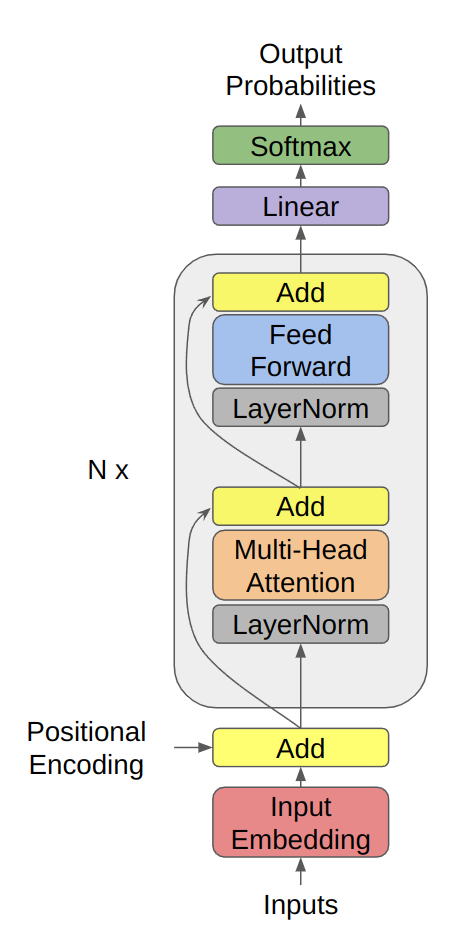

# Tools

In [1]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import torch

from collections import namedtuple

## Dataset generation
The tools below are responsible for generating the dataset. You should not modify them.

### Detailed dataset description
To generate each example, we first create a random Markov chain and sample a sequence of a given length starting at token zero. This Markov chain is specific to the current example.

To create the Markov chain, we follow this algorithm:
1. Generate a random permutation of the numbers P(x) - a bijection that maps each token in the vocabulary to another token.
2. Create a function INC(x) that maps the x-th token to the ((x+1)%N)-th token.
3. For each i-th token (node), create an outgoing edge to P(i) with probability 80% and to INC(i) with probability 20%.

This dataset design ensures that the sequences will be mostly predictable, but not completely. It also introduces learnable concepts that are both dataset-wide (due to the constant INC function) and sample-specific (due to the random P function).

In [2]:
# parameters for dataset generation. If you want to, you can change batch size, but there should be no reason to.
BATCH_SIZE = 128
SEQ_LEN = 64
VOCAB_SIZE = 10

In [3]:
import string

Edge = namedtuple("Edge", "to token prob")

In [4]:
def generate_random(size):
    """
    For generating a random sequence of elements.
    """
    prob = 1.0/size
    graph = {0: [Edge(to=0, token=a, prob=prob) for a in range(size)]}
    return graph

In [5]:
def generate_pseudo_permutation(size, true_prob=1.0):
    assert 0 < size
    assert 0 < true_prob <= 1.0
    permutation = np.random.permutation(size)
    graph = {}
    for v in range(size):
        e1 = Edge(to=(v+1) % size, token=v, prob=1. - true_prob)
        e2 = Edge(to=permutation[v], token=v, prob=true_prob)
        graph[v] = [e1, e2]
    return graph

In [6]:
class SeqGen:
    """
    For generating sequences based on a given Markov chain.
    Markov chain is represented as a directed graph with edges 
    labeled with probabilities and tokens to output
    (dictionary mapping vertex->Edge).
    Assumes that the starting vertex is 0.
    """
    def __init__(self, graph):
        self.graph = graph
        self.current = 0 # we will always start with 0

    def __iter__(self):
        return self

    def __next__(self):
        options = self.graph[self.current]
        probs = list(map(lambda x: x.prob, options))
        choice = np.random.choice(
            list(range(len(options))), size=1, p=probs)[0]
        self.current = options[choice].to
        return options[choice].token

In [7]:
def generate_dataset(gen_factory, seq_len, num_entries):
    """
    For generating datasets with num_entries elements each
    of length seq_len.

      gen_factory is a procedure that returns 
        instance of SeqGen when called.

      seq_len is the length of the sequence to generate.
      
      num_entries is the number of sequences to generate.
    """
    entries = []
    for e in range(num_entries):
        seq_gen = gen_factory()
        seq = []
        for s in range(seq_len + 1):
            seq.append(next(seq_gen))
        entries.append(seq)
    data = torch.tensor(entries, dtype=torch.long)
    x = data[:, :seq_len]
    y = data[:, 1:]       # we predict next token
    return torch.utils.data.TensorDataset(x, y)

In [8]:
def example_generator(gen):
    """
      gen is a procedure that returns a graph describing
      a Markov chain when called.
    """
    def example_gen():
        return SeqGen(gen())
    return example_gen

In [9]:
PERM_EXAMPLE_GENERATOR = example_generator(lambda: generate_pseudo_permutation(
            VOCAB_SIZE, true_prob=0.8))

RANDOM_EXAMPLE_GENERATOR = example_generator(lambda: generate_random(
            VOCAB_SIZE))


TRAIN_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=10000)
TEST_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=1000)

TRAIN_LOADER = torch.utils.data.DataLoader(
    TRAIN_DATASET, batch_size=BATCH_SIZE)
TEST_LOADER = torch.utils.data.DataLoader(TEST_DATASET, batch_size=BATCH_SIZE)

RANDOM_TRAIN_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TEST_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TRAIN_LOADER = torch.utils.data.DataLoader(
    RANDOM_TRAIN_DATASET, batch_size=BATCH_SIZE)

RANDOM_TEST_LOADER = torch.utils.data.DataLoader(
    RANDOM_TEST_DATASET, batch_size=BATCH_SIZE)



## Data visualization

In [10]:
for index, x in enumerate(TRAIN_LOADER):
  print(x[0][0])
  if index >= 10:
    break

tensor([0, 1, 7, 6, 0, 1, 7, 6, 0, 1, 7, 6, 7, 6, 0, 1, 2, 3, 9, 2, 4, 8, 9, 2,
        3, 9, 0, 1, 2, 4, 8, 5, 6, 0, 1, 2, 4, 8, 9, 2, 4, 8, 5, 3, 9, 0, 1, 7,
        6, 7, 6, 7, 8, 9, 2, 4, 8, 5, 3, 9, 2, 4, 8, 5])
tensor([0, 3, 9, 1, 5, 6, 7, 8, 9, 1, 5, 6, 4, 0, 1, 5, 6, 4, 0, 3, 9, 0, 3, 9,
        0, 1, 5, 6, 7, 8, 8, 8, 8, 8, 9, 1, 5, 6, 4, 5, 6, 4, 0, 3, 9, 1, 5, 6,
        4, 0, 3, 9, 1, 2, 7, 2, 7, 8, 8, 8, 8, 8, 8, 8])
tensor([0, 1, 7, 1, 7, 1, 2, 4, 8, 9, 3, 6, 9, 3, 6, 9, 0, 1, 2, 4, 8, 0, 5, 2,
        4, 5, 2, 4, 8, 0, 1, 2, 4, 8, 0, 5, 2, 4, 8, 0, 5, 2, 4, 8, 9, 3, 6, 7,
        1, 7, 1, 7, 1, 7, 1, 7, 8, 0, 5, 2, 4, 8, 0, 1])
tensor([0, 9, 0, 9, 0, 9, 8, 5, 4, 5, 4, 0, 9, 0, 9, 8, 9, 8, 5, 4, 0, 9, 8, 5,
        4, 0, 9, 8, 5, 4, 0, 1, 6, 3, 1, 6, 3, 1, 6, 3, 1, 6, 7, 2, 3, 1, 2, 7,
        8, 5, 6, 3, 1, 6, 3, 1, 6, 3, 1, 6, 3, 4, 0, 9])
tensor([0, 7, 1, 8, 0, 1, 8, 9, 5, 4, 3, 9, 5, 4, 3, 9, 5, 4, 3, 4, 3, 9, 5, 4,
        3, 9, 0, 7, 8, 0, 7, 1, 2, 6, 2, 6, 2, 6, 2,

In [11]:
import networkx as nx

def plot_graph(graph):
    """
    Draws the graph that describes a Markov chain.
    """
    edg_list = []
    edg_labels = {}
    for v, out_edg in graph.items():
        for edg in out_edg:
            t = (v, edg.to)
            tr = (edg.to, v)
            text = f"{v}→{edg.to} = {edg.prob:.2f}"
            if t in edg_labels:
                edg_labels[t] += "\n" + text
            elif tr in edg_labels:
                edg_labels[tr] += "\n" + text
            else:
                edg_labels[t] = text
            edg_list.append(t)
    G = nx.DiGraph(directed=True)
    G.add_edges_from(edg_list)
    pos = nx.nx_pydot.graphviz_layout(G)
    fig = plt.figure(1, figsize=(300, 120), dpi=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edg_labels, font_size=120)
    nx.draw_networkx(G, pos, node_size=50000, arrows=True, arrowsize=200)
    nx.draw_networkx_labels(G, pos, font_size=120)

Below you can find some visualizations of the data.

[0, 8, 2, 3, 5, 7, 9, 3, 5, 7, 9, 3, 5, 7, 8, 9, 3, 5, 7, 9, 3, 5, 6, 0, 8, 2, 4, 6, 0, 1, 1, 1, 1, 2, 4, 6, 0, 8, 2, 4, 5, 7, 9, 3, 5, 6, 0, 8, 2, 4, 6, 0, 8, 2, 3, 5, 6, 0, 8, 2, 3, 5, 7, 8]


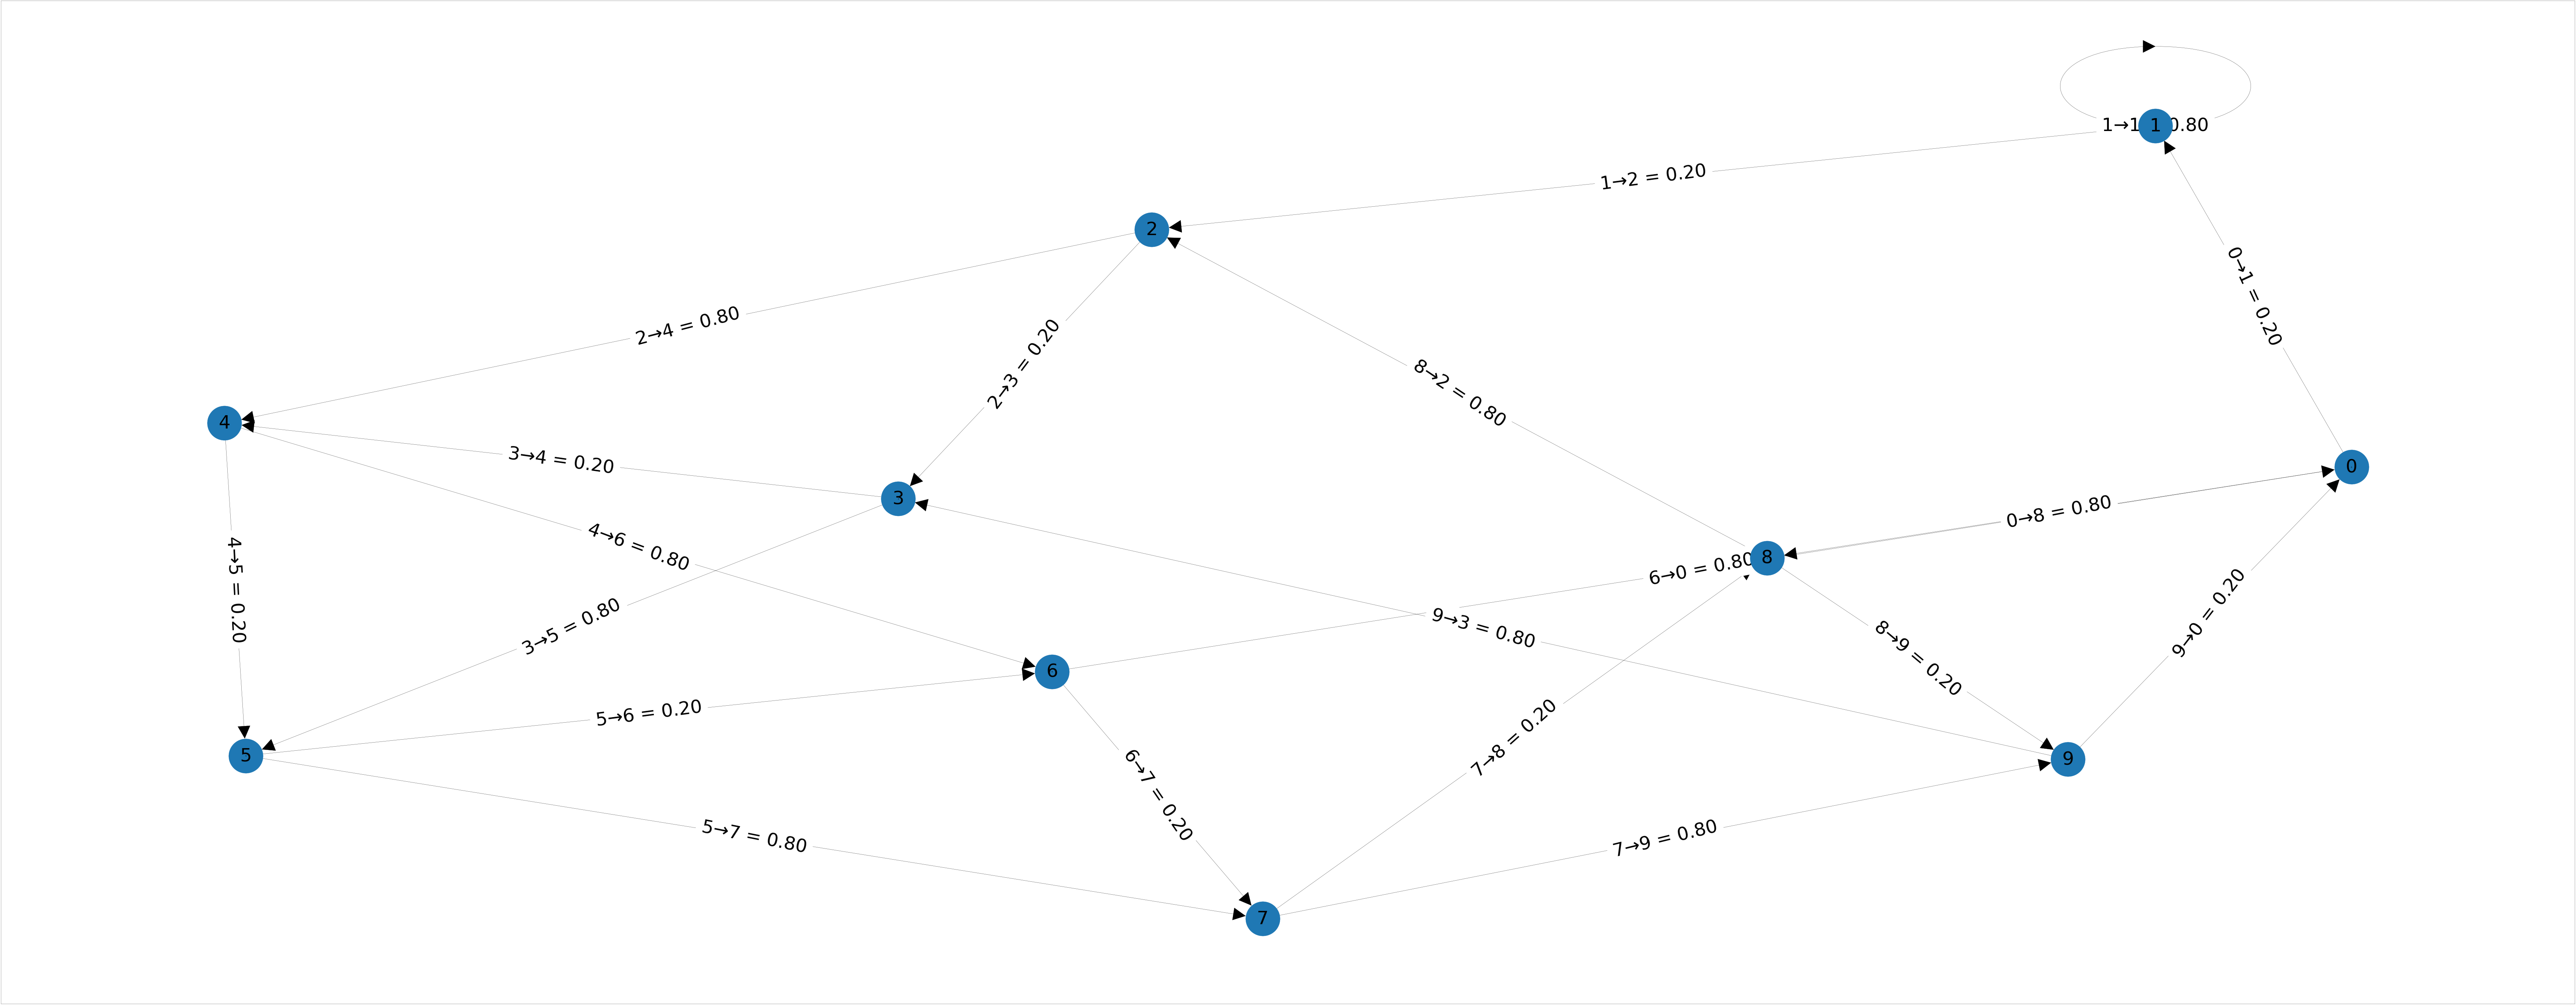

In [12]:
graph = generate_pseudo_permutation(10, true_prob=0.8)
plot_graph(graph)
data = [x for i, x in zip(range(SEQ_LEN), SeqGen(graph))]
print(data)

# Main part

In [13]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Ok we have cuda capable device")
else:
    DEVICE = torch.device("cpu")
    print("No cuda capable device. If you are running the code in Colab, you can enable a GPU by going to Runtime -> Change runtime type -> GPU.")
    print(" If you are running the code locally, you may need to install additional drivers and libraries, such as cuDNN, to enable GPU support.")


Ok we have cuda capable device


Before implementing the Transformer part of the model, you may (but don't have to) revisit the implementation of the softmax function. This can help you with the efficient implementation of the causal mask later on. 

In [14]:
def stable_softmax(x, dim):
    return torch.nn.functional.softmax(x - torch.max(x, dim, keepdims=True)[0], dim)

test_input = torch.arange(128, dtype=torch.float).reshape(2, 4, 16)
assert torch.isclose(stable_softmax(test_input + 10.0**4, dim=-1),
                     stable_softmax(test_input, dim=-1)).all()
assert torch.isclose(stable_softmax(test_input, dim=-1),
                     torch.nn.functional.softmax(test_input, dim=-1)).all()
assert torch.isclose(stable_softmax(test_input, dim=-2),
                     torch.nn.functional.softmax(test_input, dim=-2)).all()
assert torch.isclose(stable_softmax(test_input, dim=0),
                     torch.nn.functional.softmax(test_input, dim=0)).all()

## The architecture

Implement a module that performs Multi-Head Attention. For text generation, the module should be able to cache calculated keys and values. The cache should be indifferentiable (don't forget `.detach()`). Remember to use the causal mask to ensure that elements can only see themselves and elements that precede them.

In [15]:
import math

MHACache = namedtuple("MHACache", "k v")


class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model, num_heads, d_head):
        super().__init__()
        # TODO

        self.d_qkv = num_heads * d_head     # size of query, key or value vectors
        self.scale = 1/math.sqrt(self.d_qkv)

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_head = d_head

        self.to_qkv = torch.nn.Linear(d_model, 3 * self.d_qkv, bias=False)
        self.final = torch.nn.Linear(self.d_qkv, d_model)
      

    def get_empty_cache(self, batch_size):
        return MHACache(k=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE),
                        v=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE))

    def forward(self, x, cache):
        """
            x input of shape (seq, batch_size, d_model).

            cache is a MHACache object consisting of keys and values
            of shape (seq', batch_size, head, d_head)

        Returns the result of the attention computation along with the updated
        cache. The attention is calculated separately for each head. The attention
        mechanism used is decoder-style, which means that an element can only
        attend to itself and elements that precede it (including elements in the
        cache). The new cache is created by extending the old cache with the new
        keys and values computed for each head of x.
        """
        assert len(x.shape) == 3  # seq, batch, d_model
        assert x.shape[-1] == self.d_model

        assert len(cache.k.shape) == 4  # seq', batch, head, d_head
        assert cache.k.shape == cache.v.shape
        assert cache.k.shape[1] == x.shape[1]
        assert cache.k.shape[2] == self.num_heads
        assert cache.k.shape[3] == self.d_head
        # TODO
        mask = torch.full((x.shape[0], x.shape[0] + cache.k.shape[0]), -torch.inf, device=DEVICE).triu(diagonal=cache.k.shape[0] + 1)

        # qkv is 3 element tuple where each is tensor[seq, batch_size, d_qkv]
        qkv = self.to_qkv(x).chunk(3, dim=-1)

        # seq, batch_size, num_heads, d_head 
        q, k, v = map(lambda t: torch.reshape(t,(t.shape[0], t.shape[1],self.num_heads, self.d_head)), qkv)
        new_k, new_v = torch.cat((cache.k, k), dim=0), torch.cat((cache.v, v), dim=0)
        new_cache = MHACache(k=new_k.detach(), v=new_v.detach())
        
        # now k, v is of size [batch_size, num_heads, seq + seq', d_head]
        # and q is of size [batch_size, num_heads, seq, d_head]
        q, k, v = map(lambda t: torch.permute(t, (1,2,0,3)), (q, new_k, new_v))
        #dots is batch_size, num_heads, seq, seq' + seq
        dots = torch.matmul(q,torch.transpose(k, -1, -2)) * self.scale + mask

        # permute + matmul with transpose could've been done like this:
        # dots = torch.einsum('sbnd,pbnd->bnsp', [q,new_k]), but
        # that way (for me) it would be super unclear what's happening

        scores = stable_softmax(dots, dim=-1)

        # this is batch_size, num_heads, seq, d_head
        out = torch.matmul(scores, v)
        out = torch.permute(out, (2,0,1,3))

        # same situation, the above could've been done like this:
        # out = torch.einsum('bnsp,bnpd->sbnd', [scores, v])
        # but this way feels more clear, especially since I'm still
        # learning

        out = torch.reshape(out, (out.shape[0], out.shape[1], -1))

        res = self.final(out)

        assert res.shape == x.shape
        return res, new_cache

Implement a FeedForward layer (pay attention to the place where the activation function is used).

In [16]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff):
      super().__init__()
      # TODO
      self.d_model = d_model
      
      self.layers = torch.nn.Sequential(
          torch.nn.Linear(d_model, d_ff),
          torch.nn.ReLU(),
          torch.nn.Linear(d_ff, d_model),
      )

    def forward(self, x):
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      # TODO
      x = self.layers(x)

      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      return x



Implement `DecoderLayer`: 
* use residual connections as in the image
* use `torch.nn.LayerNorm(d_model)`
* use `MultiHeadAttention` and `FeedForward` that you have implemented above

In [17]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, d_ff, num_heads, d_head):
        super().__init__()
        
        self.attention_norm = torch.nn.LayerNorm(d_model)
        self.attention = MultiHeadAttention(d_model, num_heads, d_head)

        ff_norm = torch.nn.LayerNorm(d_model)
        ff = FeedForward(d_model, d_ff)

        self.ff_layer = torch.nn.Sequential(ff_norm, ff)

        # TODO

    def get_empty_cache(self, batch_size):
        return self.attention.get_empty_cache(batch_size)

    def forward(self, x, cache):
        # TODO
        after_attention, cache = (self.attention(self.attention_norm(x), cache))
        x = x + after_attention
        x = x + self.ff_layer(x)

        return x, cache

Implement positional encoding.

In [18]:
def get_positional_encoding(seqlen, hiddendim):
  """
  Returns a matrix P of shape (seqlen, hiddendim) where
  P[i] should be added to the ith element of the input sequence 
  as positional encoding.
  """
  # TODO: implement positional encoding
  dims = torch.arange(hiddendim, dtype=torch.float)
  positions = torch.arange(seqlen, dtype=torch.float)

  dims[1::2] -= 1
  dims /= hiddendim

  dims = 10000 ** -(dims)
  
  p = torch.outer(positions, dims)
  p[:, 0::2] = torch.sin(p[:, 0::2])
  p[:, 1::2] = torch.cos(p[:, 1::2])

  positional_encoding = p

  
  # output shape: (seqlen, hiddendim)
  return torch.tensor(positional_encoding, dtype=torch.float,
                      device=DEVICE)

Decoder is already implemented below.

In [19]:
class Decoder(torch.nn.Module):
    def __init__(self, vocab_size, d_model, d_ff, num_heads, d_head, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.dec_layers = torch.nn.ModuleList([
            DecoderLayer(d_model=d_model, d_ff=d_ff, num_heads=num_heads, d_head=d_head) for i in range(num_layers)
        ])
        self.output_layer = torch.nn.Linear(
            d_model, vocab_size, bias=True)

    def get_empty_cache(self, batch_size):
        return [
            l.get_empty_cache(batch_size) for l in self.dec_layers
        ]

    def forward(self, x, cache, offset=0):
        assert len(x.shape) == 2  # seq, batch
        assert (x < self.vocab_size).all()
        assert len(self.dec_layers) == len(cache)

        x = self.embedding(x)
        
        if POSITIONAL:
          x = x + get_positional_encoding(x.shape[0]+offset, self.d_model)[offset:, None, :]

        new_cache = []
        for l, c in zip(self.dec_layers, cache):
            x, nc = l(x, c)
            new_cache.append(nc)

        x = self.output_layer(x)

        return torch.distributions.Categorical(logits=x), new_cache


## Training and evaluation

Eval is already implemented, please note that the model expects the input of shape `(seq_len, batch)`.

In [20]:
def take_most_probable(dist):
    return torch.argmax(dist.logits.detach(), dim=-1)

def take_sample(dist):
  return dist.sample()


def eval(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = 0
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum().cpu().item()
        total += np.prod(y.shape)

    return total_correct/total

In [21]:
def train(model, train_loader, test_loader, num_epoches):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    acc = 0
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]))

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        epoch_avg_loss = epoch_total_loss / num_iters
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")
    return acc


Train the model on the dataset.

In [22]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 5
LR = 0.001
POSITIONAL = True

model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model.to(DEVICE)
train(model, TRAIN_LOADER, TEST_LOADER, 50)

<ipython-input-18-5130a6dccb78>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 0 loss:2.175980377800857 acc:0.2914
EPOCH 1 loss:1.9908299144310286 acc:0.3679
EPOCH 2 loss:1.3905574845362314 acc:0.6899
EPOCH 3 loss:0.8413732014124906 acc:0.7121
EPOCH 4 loss:0.7877448306807989 acc:0.7145
EPOCH 5 loss:0.7653189097778706 acc:0.7163
EPOCH 6 loss:0.7498426460012605 acc:0.7172
EPOCH 7 loss:0.7385195282441152 acc:0.7183
EPOCH 8 loss:0.7306460858900335 acc:0.7200
EPOCH 9 loss:0.7246745794634276 acc:0.7217
EPOCH 10 loss:0.7190101606936394 acc:0.7223
EPOCH 11 loss:0.714300945589814 acc:0.7226
EPOCH 12 loss:0.7107484423661534 acc:0.7225
EPOCH 13 loss:0.7082203128669835 acc:0.7224
EPOCH 14 loss:0.7058791661564308 acc:0.7225
EPOCH 15 loss:0.7035168703598312 acc:0.7226
EPOCH 16 loss:0.7016568206533601 acc:0.7224
EPOCH 17 loss:0.6999370584005042 acc:0.7232
EPOCH 18 loss:0.6981792057616801 acc:0.7228
EPOCH 19 loss:0.6970390813260139 acc:0.7229
EPOCH 20 loss:0.6956415878066534 acc:0.7228
EPOCH 21 loss:0.6935460635378391 acc:0.7231
EPOCH 22 loss:0.6921092754677881 acc:0.7224


0.717171875

Make sure your model is not cheating (that is an element cannot attend to the next element). To do this check that accuracy on the random dataset is around 10% .

In [23]:
model_test = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS)

model_test.to(DEVICE)
train(model_test, RANDOM_TRAIN_LOADER, RANDOM_TEST_LOADER, 201)

EPOCH 0 loss:2.5724501609802246 acc:0.1008
EPOCH 1 loss:2.4826009273529053 acc:0.1067
EPOCH 2 loss:2.423835039138794 acc:0.0989
EPOCH 3 loss:2.373257637023926 acc:0.0947
EPOCH 4 loss:2.3593735694885254 acc:0.0927
EPOCH 5 loss:2.34151029586792 acc:0.0986


<ipython-input-18-5130a6dccb78>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 6 loss:2.3283379077911377 acc:0.0998
EPOCH 7 loss:2.320852041244507 acc:0.1016
EPOCH 8 loss:2.3172285556793213 acc:0.1023
EPOCH 9 loss:2.316790819168091 acc:0.1009
EPOCH 10 loss:2.3136796951293945 acc:0.1013
EPOCH 11 loss:2.306749105453491 acc:0.1014
EPOCH 12 loss:2.2995400428771973 acc:0.1044
EPOCH 13 loss:2.2941837310791016 acc:0.1036
EPOCH 14 loss:2.290555953979492 acc:0.1028
EPOCH 15 loss:2.2883851528167725 acc:0.0981
EPOCH 16 loss:2.2869834899902344 acc:0.0944
EPOCH 17 loss:2.2848007678985596 acc:0.0955
EPOCH 18 loss:2.2814433574676514 acc:0.0963
EPOCH 19 loss:2.277909517288208 acc:0.0966
EPOCH 20 loss:2.274837017059326 acc:0.0988
EPOCH 21 loss:2.272138833999634 acc:0.0941
EPOCH 22 loss:2.2697818279266357 acc:0.0964
EPOCH 23 loss:2.2677412033081055 acc:0.0978
EPOCH 24 loss:2.265678882598877 acc:0.0980
EPOCH 25 loss:2.263350248336792 acc:0.0997
EPOCH 26 loss:2.261029005050659 acc:0.1003
EPOCH 27 loss:2.258937120437622 acc:0.0995
EPOCH 28 loss:2.2568016052246094 acc:0.0998
EPO

0.10265625

Choose a prefix of an arbitrary sequence from the test set (you can also write your sequence, just remember that every sequence starts with token 0). For each position in this sequence print the probability distribution over the next token according to the model. Analyze the results.

In [24]:
#TODO
sentence_no = 0
x, y = next(iter(TEST_LOADER))

arb_seq = x[sentence_no].to(DEVICE)

model.eval()


print(arb_seq)

new_res, new_cache = model(arb_seq.view(64, 1), model.get_empty_cache(1))

most_probable = take_most_probable(new_res).flatten()
for idx, pos in enumerate(new_res.probs):
    pos = pos.flatten()
    print(''.join([f'position: {idx + 1:2d} '] + [f'{i}:{pos[i]:.2f} ' for i in range(10)] + [f'most_probable: {most_probable[idx]} actual_next: {y[sentence_no][idx].item()} preceding_token: {arb_seq[idx]}']))


tensor([0, 9, 5, 3, 4, 5, 3, 4, 7, 8, 8, 9, 5, 3, 4, 7, 2, 1, 0, 9, 5, 6, 6, 6,
        6, 7, 2, 1, 0, 9, 5, 3, 4, 7, 2, 1, 2, 1, 0, 1, 0, 1, 0, 9, 5, 3, 4, 7,
        8, 8, 9, 0, 9, 5, 3, 4, 7, 8, 8, 8, 8, 8, 8, 8], device='cuda:0')
position:  1 0:0.06 1:0.32 2:0.08 3:0.09 4:0.05 5:0.06 6:0.11 7:0.08 8:0.06 9:0.09 most_probable: 1 actual_next: 9 preceding_token: 0
position:  2 0:0.25 1:0.10 2:0.10 3:0.10 4:0.12 5:0.09 6:0.10 7:0.07 8:0.08 9:0.00 most_probable: 0 actual_next: 5 preceding_token: 9
position:  3 0:0.12 1:0.08 2:0.08 3:0.06 4:0.11 5:0.00 6:0.33 7:0.07 8:0.14 9:0.00 most_probable: 6 actual_next: 3 preceding_token: 5
position:  4 0:0.12 1:0.12 2:0.07 3:0.00 4:0.45 5:0.00 6:0.09 7:0.05 8:0.09 9:0.00 most_probable: 4 actual_next: 4 preceding_token: 3
position:  5 0:0.22 1:0.15 2:0.07 3:0.00 4:0.06 5:0.20 6:0.09 7:0.14 8:0.06 9:0.00 most_probable: 0 actual_next: 5 preceding_token: 4
position:  6 0:0.00 1:0.00 2:0.00 3:0.74 4:0.00 5:0.00 6:0.26 7:0.00 8:0.00 9:0.00 most_probable

<ipython-input-18-5130a6dccb78>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,



## Summary 

For the first few tokens, the model predicts the next token as INC(previous token).  
As soon as the model sees y after x, it's next prediction after x is usually y.  
It can be seen that the more times y comes after x, the more confident
the model is that it will happen in the future (that is, even if it mispredicts once and instead of predicted y, z comes after x, it doesn't necessarily mean that the next time, it will predict z after x).  
Most importantly - after some time, the distribution over the next token
focuses exclusively on only 2 numbers and no other. Moreover, usually one of those numbers is given about 80% probability, and the other about 20% and that's
exactly the way the data was generated.

One may want to know how many elements of a sequence a model needs to see in order to learn the underlying pattern.
To check this write a function that given a model and a data set loader calculates for each position in the range $[0,\text{SEQ_LEN}]$ average model accuracy. Assume that we take the most probable answer.

In [26]:
# TODO
def get_pos_acc(model, data_loader):
    model.eval()
    ti = iter(data_loader)

    total = 0
    total_correct = torch.zeros((SEQ_LEN,))
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        # [seq_len, batch_size]
        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum(dim=-1).cpu()
        total += y.shape[1]

    return total_correct/total

accuracy_per_pos = get_pos_acc(model, TEST_LOADER)

for idx, acc in enumerate(accuracy_per_pos):
    print(f'pos {idx}: {acc:.2f}')

pos 0: 0.27
pos 1: 0.32
pos 2: 0.37
pos 3: 0.41
pos 4: 0.43
pos 5: 0.46
pos 6: 0.49
pos 7: 0.53
pos 8: 0.55
pos 9: 0.61
pos 10: 0.64
pos 11: 0.64
pos 12: 0.65
pos 13: 0.67
pos 14: 0.67
pos 15: 0.69
pos 16: 0.72
pos 17: 0.69
pos 18: 0.71
pos 19: 0.71
pos 20: 0.76
pos 21: 0.74
pos 22: 0.74
pos 23: 0.74
pos 24: 0.75
pos 25: 0.76
pos 26: 0.74
pos 27: 0.75
pos 28: 0.75
pos 29: 0.80
pos 30: 0.78
pos 31: 0.79
pos 32: 0.78
pos 33: 0.78
pos 34: 0.80
pos 35: 0.78
pos 36: 0.79
pos 37: 0.81
pos 38: 0.79
pos 39: 0.78
pos 40: 0.81
pos 41: 0.81
pos 42: 0.81
pos 43: 0.78
pos 44: 0.80
pos 45: 0.81
pos 46: 0.79
pos 47: 0.79
pos 48: 0.83
pos 49: 0.80
pos 50: 0.82
pos 51: 0.79
pos 52: 0.80
pos 53: 0.81
pos 54: 0.81
pos 55: 0.81
pos 56: 0.81
pos 57: 0.81
pos 58: 0.80
pos 59: 0.80
pos 60: 0.81
pos 61: 0.81
pos 62: 0.79
pos 63: 0.78


<ipython-input-18-5130a6dccb78>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,



## Summary

It can be seen, that the model is learning very fast.  
After about 15 positions, average accuracy is over 70% and increasing until about 30th position, from where it's just oscillating around 80%.

# Additional experiments, text generation and visualizations 

## Experiments considering number of layers and positional encodings

In [27]:
#TODO
accuracies = torch.zeros((2,4), dtype=torch.float)
for POSITIONAL in (True,False,):
    for NUM_LAYERS in range(4):
        print(f'POSITIONAL: {POSITIONAL}, NUM_LAYERS: {NUM_LAYERS}')
        model_exp = Decoder(vocab_size=VOCAB_SIZE, 
                        d_model=HIDDEN_DIM,
                        d_ff=HIDDEN_FF,
                        num_heads=NUM_HEADS,
                        d_head=HEAD_DIM,
                        num_layers=NUM_LAYERS)

        model_exp.to(DEVICE)
        last_accuracy = train(model_exp, TRAIN_LOADER, TEST_LOADER, 50)
        accuracies[1 if POSITIONAL else 0, NUM_LAYERS] = last_accuracy
POSITIONAL = True # restore positional 

POSITIONAL: True, NUM_LAYERS: 0


<ipython-input-18-5130a6dccb78>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


EPOCH 0 loss:2.2679837293262723 acc:0.2811
EPOCH 1 loss:2.1862133816827702 acc:0.2811
EPOCH 2 loss:2.1807205043261564 acc:0.2811
EPOCH 3 loss:2.178671381141566 acc:0.2811
EPOCH 4 loss:2.177693837805639 acc:0.2811
EPOCH 5 loss:2.177175201947176 acc:0.2811
EPOCH 6 loss:2.176882227764854 acc:0.2811
EPOCH 7 loss:2.176708927637414 acc:0.2811
EPOCH 8 loss:2.1766025144842605 acc:0.2811
EPOCH 9 loss:2.1765350269365915 acc:0.2811
EPOCH 10 loss:2.1764909496790246 acc:0.2811
EPOCH 11 loss:2.1764614491523067 acc:0.2811
EPOCH 12 loss:2.1764412499681303 acc:0.2811
EPOCH 13 loss:2.1764271712001366 acc:0.2811
EPOCH 14 loss:2.176417154601858 acc:0.2811
EPOCH 15 loss:2.176409920559654 acc:0.2811
EPOCH 16 loss:2.176404563686516 acc:0.2811
EPOCH 17 loss:2.1764005739477614 acc:0.2811
EPOCH 18 loss:2.1763974956319303 acc:0.2811
EPOCH 19 loss:2.1763950480690486 acc:0.2811
EPOCH 20 loss:2.176393059235585 acc:0.2811
EPOCH 21 loss:2.176391311838657 acc:0.2811
EPOCH 22 loss:2.1763897696627845 acc:0.2811
EPOCH 23

In [28]:
print(f'With positional embedding: {accuracies[1]}')
print(f'Without positional embedding: {accuracies[0]}')

With positional embedding: tensor([0.2811, 0.4571, 0.7213, 0.7226])
Without positional embedding: tensor([0.2811, 0.3215, 0.6623, 0.7115])



## Summary

As predicted, the model trained without positional embedding is able to achieve expected accuracy, but needs more layers to do so.

## Text Generation

Use cache to perform efficient text generation. You should generate text token by token. You should consider two choice procedures:
* output the most probable token
* sample from the distribution returned by the model

In [29]:
# TODO
# type can be 'probability' or 'sample'
POSITIONAL = True
def generate_seq(model, len, type='probability'):
    result_seq = [0]
    next_token = 0
    cache = model.get_empty_cache(1)
    model.eval()
    for i in range(len - 1):
        res, cache = model(torch.tensor([[next_token]], device=DEVICE), cache, offset=i)

        next_token = take_most_probable(res) if type == 'probability' else take_sample(res)
        next_token = next_token.cpu().item()
        result_seq.append(next_token)

    return result_seq

for i in range(5):
    print(f'Sentence {i}')
    print(generate_seq(model, 64))
    print(generate_seq(model, 64, 'sample'))


Sentence 0


<ipython-input-18-5130a6dccb78>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7]
[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 4, 8, 5, 2, 4, 5, 6, 9, 3, 0, 1, 2, 4, 5, 6, 9, 3, 0, 1, 2, 3, 0, 1, 2, 4, 8, 9, 3, 0, 1, 2, 4, 8, 5, 6, 9, 3, 0, 1, 2, 4, 8, 5, 6, 9, 3, 0, 1, 2, 3, 0, 1, 2]
Sentence 1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7]
[0, 7, 1, 4, 0, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 6, 9, 6, 9, 6, 7, 1, 2, 2, 3, 3, 4, 0, 1, 4, 0, 7, 1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 8, 9, 6, 9, 6, 9, 6]
Sentence 2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7, 8, 9, 0, 1, 2, 3, 7]
[0, 1, 4, 8, 


## Summary

The model spots the pattern almost immediately.

If taking most probable output, nothing interesting happens and generated sequence is the same every time (as expected).  
When sampling the next token from a distribution, the outputs are more similar to generated sequences.  
There often are long sequences of the same numbers - that happens when the model generates two the same tokens in the row (it's not that weird). As soon as that happens, the model is more confident that in this sequence this token precedes itself and takes that into consideration the next time it sees it and something of a loop begins - the model starts being more and more confident with the fact that this token precedes itself and keeps generating it.  
In fact, the same thing happens with sequences of two interleaving tokens - except that it happens less frequently, because for this to happen, the model has to suspect, that x comes after y AND y comes after x, in the previous case it fully sufficed that x would come after x for the "loop" to start.

In [30]:
# Just a quick check that the cache is working properly
x, y = next(iter(TEST_LOADER))
arb_seq = x[0]
arb_seq = arb_seq.to(DEVICE)
model.eval()
print(arb_seq)

new_res, new_cache = model(arb_seq.view(64, 1), model.get_empty_cache(1))

most_probable = take_most_probable(new_res)
print(most_probable.shape)
most_probable = most_probable.flatten()

cache = model.get_empty_cache(1)

mp_new = []
for idx, pos in enumerate(arb_seq):
    res, cache = model(torch.tensor([[pos]], device=DEVICE), cache, offset=idx)
    mp_new.append(take_most_probable(res).detach().cpu().item())

same = torch.all(most_probable.cpu() == torch.tensor(mp_new))
print(same)
assert(same)



tensor([0, 9, 5, 3, 4, 5, 3, 4, 7, 8, 8, 9, 5, 3, 4, 7, 2, 1, 0, 9, 5, 6, 6, 6,
        6, 7, 2, 1, 0, 9, 5, 3, 4, 7, 2, 1, 2, 1, 0, 1, 0, 1, 0, 9, 5, 3, 4, 7,
        8, 8, 9, 0, 9, 5, 3, 4, 7, 8, 8, 8, 8, 8, 8, 8], device='cuda:0')
torch.Size([64, 1])


<ipython-input-18-5130a6dccb78>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(positional_encoding, dtype=torch.float,


tensor(True)


## Attention visualizations (optional)